In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('진짜가중평균.csv',engine='python',encoding='utf-8-sig')
data1 = pd.read_csv('직전년도.csv',engine='python',encoding='utf-8-sig')
data2 = pd.read_csv('프로기록있는선수들통과11.csv') # 대회년도 평균내서 가져오기 위한 용도
key = pd.read_csv('afterdrop.csv',engine='python',encoding='utf-8-sig')

In [3]:
data2 = data2.reset_index(drop=True)
year = data2.groupby(['선수명','대학교']).mean()
data5 =pd.merge(data,year['대회년도'],how='left',on='선수명').dropna(axis=0).reset_index(drop=True)
data3 =pd.merge(data5,data1[['선수명','키','EFF']],how='left',on='선수명').dropna(axis=0).reset_index(drop=True)
data3 = data3.drop(['Unnamed: 0'], axis=1)
data3 # 대회년도, 키, 4년 max eff추가

,선수명,대학교,경기수,전체 출전시간,득점 전체,득점 평균,2점슛 성공,2점슛 시도,2점슛 성공률,3점슛 성공,...,굿디펜스,속공,FBF,턴오버,팀 리바운드,팀 턴오버,년수,대회년도,키,EFF
0,강병진,건국대학교,3.6,421.785000,10.3,2.2,3.2,8.2,4.030,1.2,...,1.6,0.0,0.0,4.0,0.0,0.0,3.0,2009.000000,193.0,81.0
1,강상재,고려대학교,18.9,4205.098333,233.0,22.9,90.9,162.4,10.807,10.4,...,9.3,8.9,2.6,28.4,0.8,0.0,4.0,2014.500000,200.0,807.0
2,강우형,경희대학교,6.0,1391.380000,32.5,4.0,11.0,13.6,7.320,2.5,...,5.4,0.0,0.0,7.5,0.0,0.0,3.0,2004.333333,191.0,44.0
3,강은식,한양대학교,4.6,896.576667,56.3,11.9,22.1,36.6,5.998,0.3,...,8.9,0.0,0.0,8.0,0.0,0.0,3.0,2002.666667,198.0,90.0
4,강준구,한양대학교,5.1,1094.250000,47.1,8.6,7.2,13.9,4.300,9.1,...,2.1,0.0,0.0,7.8,0.0,0.0,3.0,2000.000000,185.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,홍경기,고려대학교,4.0,1365.050000,51.0,12.0,8.0,14.0,5.710,10.0,...,1.0,0.0,0.0,10.0,0.0,0.0,1.0,2010.000000,184.0,362.0
354,홍석민,동국대학교,18.7,2765.428333,90.2,9.7,27.4,58.0,10.248,11.1,...,2.8,1.1,0.6,12.9,1.6,0.7,4.0,2015.333333,197.0,2.0
355,홍성헌,성균관대학교,4.1,1235.015000,59.3,14.3,22.8,54.2,4.430,0.0,...,7.2,0.0,0.0,6.3,0.0,0.0,3.0,2005.000000,195.0,-1.0
356,홍수화,한양대학교,4.3,1148.940000,55.5,12.5,15.0,26.6,5.464,5.8,...,3.5,0.0,0.0,12.8,0.0,0.0,4.0,2007.500000,194.5,333.0


In [4]:
final = (data3.drop_duplicates(['선수명'])).reset_index(drop=True)
final #최종 데이터 프레임

,선수명,대학교,경기수,전체 출전시간,득점 전체,득점 평균,2점슛 성공,2점슛 시도,2점슛 성공률,3점슛 성공,...,굿디펜스,속공,FBF,턴오버,팀 리바운드,팀 턴오버,년수,대회년도,키,EFF
0,강병진,건국대학교,3.6,421.785000,10.3,2.2,3.2,8.2,4.030,1.2,...,1.6,0.0,0.0,4.0,0.0,0.0,3.0,2009.000000,193.0,81.0
1,강상재,고려대학교,18.9,4205.098333,233.0,22.9,90.9,162.4,10.807,10.4,...,9.3,8.9,2.6,28.4,0.8,0.0,4.0,2014.500000,200.0,807.0
2,강우형,경희대학교,6.0,1391.380000,32.5,4.0,11.0,13.6,7.320,2.5,...,5.4,0.0,0.0,7.5,0.0,0.0,3.0,2004.333333,191.0,44.0
3,강은식,한양대학교,4.6,896.576667,56.3,11.9,22.1,36.6,5.998,0.3,...,8.9,0.0,0.0,8.0,0.0,0.0,3.0,2002.666667,198.0,90.0
4,강준구,한양대학교,5.1,1094.250000,47.1,8.6,7.2,13.9,4.300,9.1,...,2.1,0.0,0.0,7.8,0.0,0.0,3.0,2000.000000,185.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,홍경기,고려대학교,4.0,1365.050000,51.0,12.0,8.0,14.0,5.710,10.0,...,1.0,0.0,0.0,10.0,0.0,0.0,1.0,2010.000000,184.0,362.0
327,홍석민,동국대학교,18.7,2765.428333,90.2,9.7,27.4,58.0,10.248,11.1,...,2.8,1.1,0.6,12.9,1.6,0.7,4.0,2015.333333,197.0,2.0
328,홍성헌,성균관대학교,4.1,1235.015000,59.3,14.3,22.8,54.2,4.430,0.0,...,7.2,0.0,0.0,6.3,0.0,0.0,3.0,2005.000000,195.0,-1.0
329,홍수화,한양대학교,4.3,1148.940000,55.5,12.5,15.0,26.6,5.464,5.8,...,3.5,0.0,0.0,12.8,0.0,0.0,4.0,2007.500000,194.5,333.0


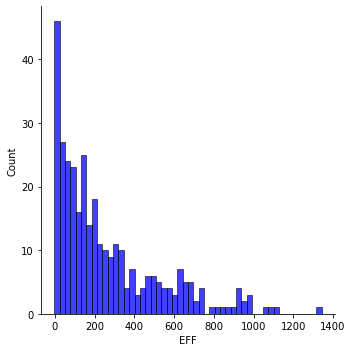

In [6]:
sns.displot(final['EFF'], bins=50, color='blue')

In [ ]:
#data = final['EFF']
#for i in range(len(data)):
#    data[i] = np.log1p(data[i]) 

In [7]:
# 대학교 범주형 데이터 라벨링
univ = final['대학교'].unique()
for i in range(len(univ)):
    final.replace(univ[i],i,inplace=True)

In [ ]:
#for i in range(len(final['EFF'])):
#    if final['EFF'][i] < -100:
#        final['EFF'][i] = -1
#final.replace(np.nan,-1,inplace=True)

In [8]:
df_x = final.drop(['EFF', '선수명'], axis = 1)
df_y = final['EFF']

In [10]:
# 데이터 나누기
x_train, x_, y_train, y_ = train_test_split(df_x, df_y, random_state = 0, test_size = 0.30)
x_valid, x_test, y_valid, y_test = train_test_split(x_, y_, random_state = 0, test_size = 0.4)

In [16]:
import xgboost as xgb
from sklearn.metrics import log_loss

dtrain = xgb.DMatrix(x_train, label=y_train)
dvalid = xgb.DMatrix(x_valid, label=y_valid)
dtest = xgb.DMatrix(x_test)
params = {'reg':'squarederror', 'verbosity':0, 'random_state':71, 'eval_metric':'logloss'}
num_round = 500

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
model = xgb.train(params, dtrain, num_round, evals=watchlist, early_stopping_rounds=20)
y_pred = model.predict(dtest)
print(y_pred)

[0]	train-logloss:-8765.05859	eval-logloss:-11620.36914
[1]	train-logloss:-8765.05371	eval-logloss:-11662.74805
[2]	train-logloss:-8765.05371	eval-logloss:-11662.74805
[3]	train-logloss:-8765.05371	eval-logloss:-11662.74805
[4]	train-logloss:-8765.05371	eval-logloss:-11662.74805
[5]	train-logloss:-8765.05371	eval-logloss:-11662.74805
[6]	train-logloss:-8765.05371	eval-logloss:-11662.74805
[7]	train-logloss:-8765.05371	eval-logloss:-11662.74805
[8]	train-logloss:-8765.05371	eval-logloss:-11662.74805
[9]	train-logloss:-8765.05371	eval-logloss:-11662.74805
[10]	train-logloss:-8765.05371	eval-logloss:-11662.74805
[11]	train-logloss:-8765.05371	eval-logloss:-11662.74805
[12]	train-logloss:-8765.05371	eval-logloss:-11662.74805
[13]	train-logloss:-8765.05371	eval-logloss:-11662.74805
[14]	train-logloss:-8765.20606	eval-logloss:-11662.74805
[15]	train-logloss:-8765.20410	eval-logloss:-11646.16894
[16]	train-logloss:-8765.21387	eval-logloss:-11646.16894
[17]	train-logloss:-8765.21387	eval-loglo

In [ ]:
'''
# 하이퍼파라미터 튜닝

min_rmse = 10000
learning_rate = 0
max_depth = 0
n_estimators = 0
#learning rate
for i in np.arange(0.1,0.4,0.01):
    # max_depth
    for j in range(3,7):
        #n_esti
        for k in range(100,500,10):
            model = xgboost.XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=100) 
            model.fit(x_train,y_train)
            y_pred = model.predict(x_valid)
            rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
            
            if rmse <=min_rmse:
                min_rmse = rmse
                learning_rate = i
                max_depth = j
                n_estimators = k
print('learning_rate = ', learning_rate)
print('max_depth = ',max_depth)
print('n_estimators = ',n_estimators)
'''

Text(0, 0.5, 'pred')

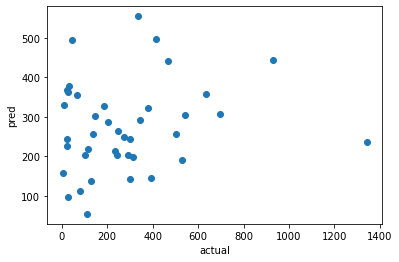

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('pred')